In [1]:
# Importing python libraries required for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the data for the loan from loan.csv
loan = pd.read_csv('loan.csv')

C:\Users\nihaa\AppData\Local\Temp\ipykernel_5292\3942410754.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


In [7]:
loan.shape

(39717, 111)

In [8]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [9]:
# Checking for all the null Columns
loan.isnull().all(axis=0).sum()

#Observation: It seems there are 54 columns which contains null values.

54

In [10]:
# Checking for all the null rows
loan.isnull().all(axis=1).sum()

# Observation: It seems there are no rows containing null values.

0

In [11]:
loan.isnull().sum().sort_values(ascending=False)
# Filtering columns having more than 90% null values.
column_list = loan.columns[loan.isnull().sum()/loan.shape[0] > 0.9]

loan = loan.drop(column_list, axis=1)
loan.shape

(39717, 55)

In [12]:
column_list = loan.columns[loan[loan == 0].count(axis=0)/loan.shape[0] > 0.8]
loan = loan.drop(column_list, axis=1)
loan.shape

(39717, 42)

In [13]:
# Checking first and last enteries of data.
loan.head(5)

# Removing % from int_rate
loan.int_rate = loan.int_rate.str.rstrip('%').astype('float64')
loan.revol_util = loan.revol_util.str.rstrip('%').astype('float64')
loan.term = loan.term.str.lstrip('')
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,f,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,f,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,f,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,f,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,f,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,1,INDIVIDUAL


In [14]:
# Analysing further irrelevant columns having no direct relationship with loan defaulter status.
columns_filtered_list = [column_name for column_name in loan.columns if loan[column_name].unique().size == 1]
print(columns_filtered_list)

#Removing irrelevant columns with single unique code.
loan = loan.drop(columns_filtered_list, axis=1)

loan.head()

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1687,9.4,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,27783,53.9,38,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16


In [15]:
# Verifying duplicate entries in columns, and dropping if present.
columns_filtered_list = [column_name for column_name in loan.columns if loan[column_name].duplicated().sum() == 0]
print(columns_filtered_list)

# Observation: It seems there are no duplicates in the id, member_id and url columns, and hence can be ignored it from the analysis.

['id', 'member_id', 'url']


In [16]:
# Removing irrelevant columns which don't have direct relationship with loan defaulter.
columns_unavailable_for_new_loan = ['total_pymnt', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'total_pymnt_inv']
irrelavant_columns =  columns_filtered_list + columns_unavailable_for_new_loan + ['desc', 'zip_code', 'title']

In [17]:
#Removing irrelevant columns with single unique code.
loan = loan.drop(irrelavant_columns, axis=1)

loan.shape

(39717, 26)

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


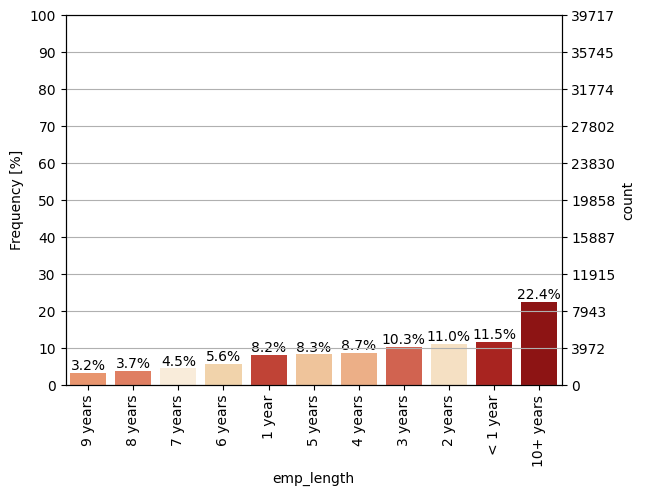

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


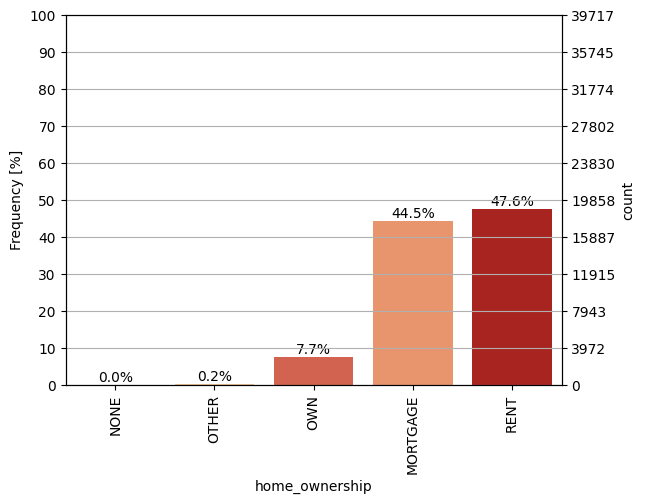

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


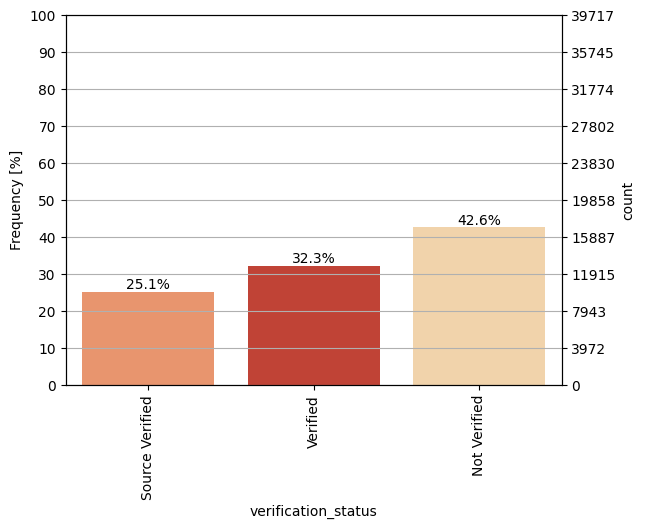

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


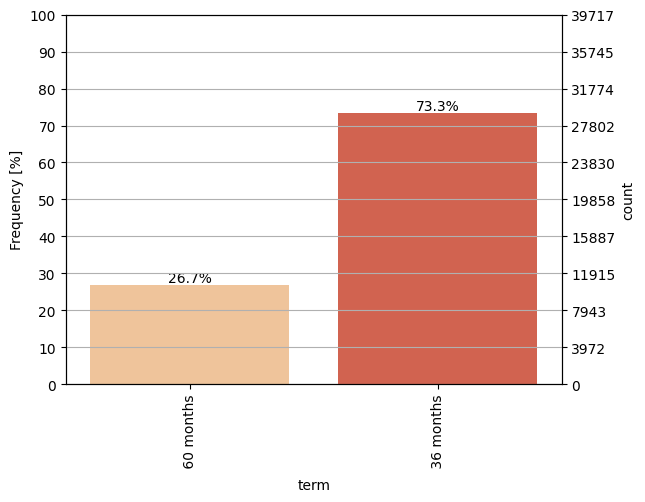

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


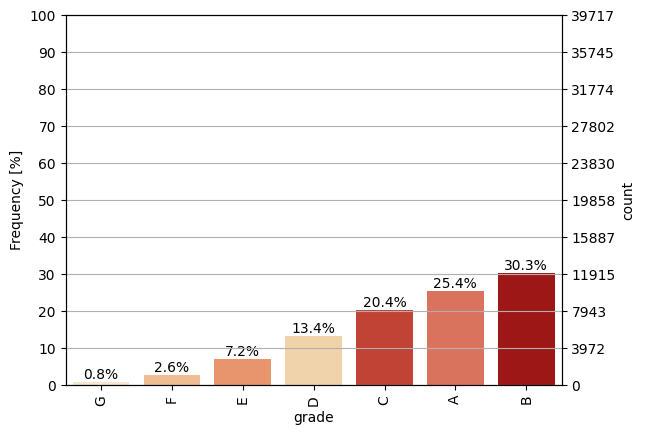

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


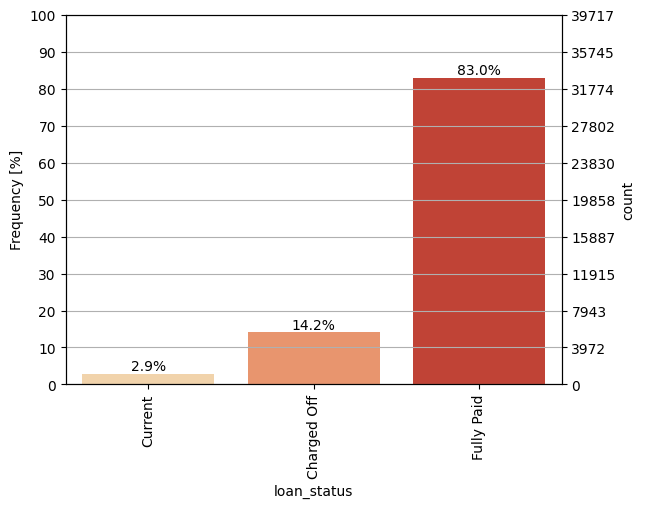

C:\Users\nihaa\AppData\Local\Temp\ipykernel_8824\3216811803.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  x1.set_xticklabels(x1.get_xticklabels(),rotation=90)


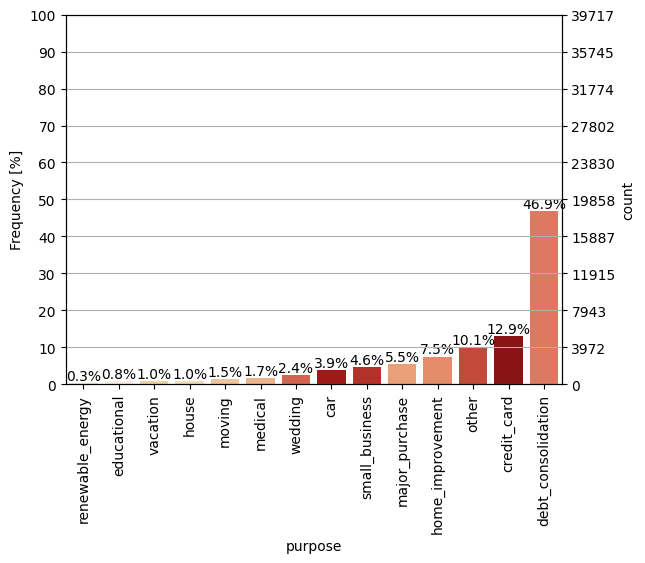

In [18]:
import matplotlib.ticker as ticker
def countplot(column_name, hue_col=None):
    x1 = sns.countplot(x=column_name, data=loan, order=loan[column_name].value_counts(ascending=True).index,hue=column_name, palette="OrRd_r", legend=False)
    x2=x1.twinx()
    count = loan.shape[0]
    # Switching the axis so that count axis is on right and frequency on left
    x2.yaxis.tick_left()
    x1.yaxis.tick_right()
    x1.yaxis.set_label_position('right')
    x2.yaxis.set_label_position('left')
    x2.set_ylabel('Frequency [%]')
    for p in x1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        x1.annotate('{:.1f}%'.format(100.*y/count), (x.mean(), y),
                ha='center', va='bottom')
    x1.yaxis.set_major_locator(ticker.LinearLocator(11))
    x2.set_ylim(0,100)
    x1.set_ylim(0,count)
    x2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    x1.set_xticklabels(x1.get_xticklabels(),rotation=90)
    x2.grid(None)
    plt.show()
    
#numeric_columns = loan.select_dtypes(['number']).columns.to_list()
countplot('emp_length')
countplot('home_ownership')
countplot('verification_status')
countplot('term')
countplot('grade')
countplot('loan_status')
countplot('purpose')


#### From above count graphs we can draw below conclusions:
Employees with 10+ years experience take maximum number of loans</br>
Most loans are taken from people whose house ownership status is either rent or mortgage</br>
Higher number of loans are taken from non verified sources</br>
36 months loans are significantly higher than 60 months loans</br>
Grade B loans are sold more than other grades</br>
Most number of loans are taken for debt consolidation purpose</br>

# Segmented Univariate Analysis

In [19]:
# Data Cleaning: Since only the fully paid and charged off makes more sense for analysis, and hence we are dropping rows having loan status as 'Current'.
loan = loan[loan['loan_status'] != 'Current']

def boxplot_segmented(x_label, y_label, data):
    sns.boxplot(x=x_label, y=y_label, hue=x_label, data=data, palette='OrRd_r', legend=False)
    plt.show()


In [20]:
print(f'Quantitative analysis of loan_amount\n {loan.loan_amnt.describe().round(2)}')
print(f'Quantitative analysis of loan_amount\n {loan["funded_amnt"].describe().round(2)}')
print(f'Quantitative analysis of loan_amount\n {loan["installment"].describe().round(2)}')

Quantitative analysis of loan_amount
 count    38577.00
mean     11047.03
std       7348.44
min        500.00
25%       5300.00
50%       9600.00
75%      15000.00
max      35000.00
Name: loan_amnt, dtype: float64
Quantitative analysis of loan_amount
 count    38577.00
mean     10784.06
std       7090.31
min        500.00
25%       5200.00
50%       9550.00
75%      15000.00
max      35000.00
Name: funded_amnt, dtype: float64
Quantitative analysis of loan_amount
 count    38577.00
mean       322.47
std        208.64
min         15.69
25%        165.74
50%        277.86
75%        425.55
max       1305.19
Name: installment, dtype: float64


In [21]:
# Basic statistics with .describe() -Quantitative Variables
print('Before Removal of Outliers :\n')
print(loan['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loan["annual_inc"].describe())
#Observations:
# We noticed there is a significantly higher value in annual income and hence we did outlier treatment and removed that column.

Before Removal of Outliers :

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


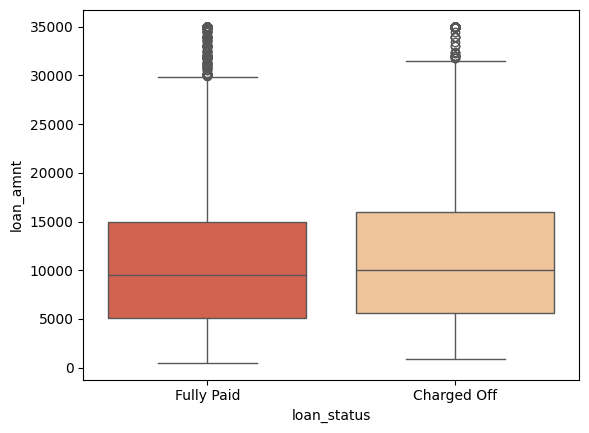

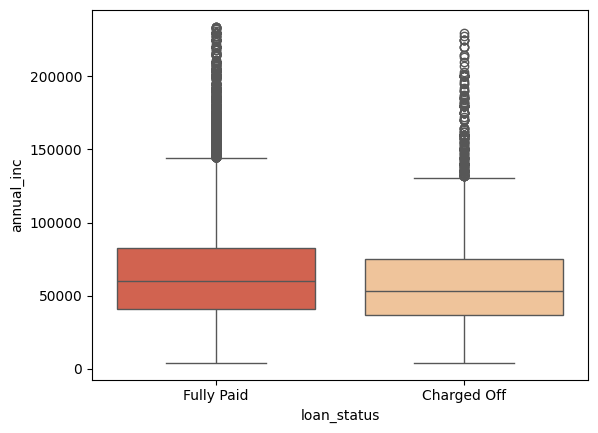

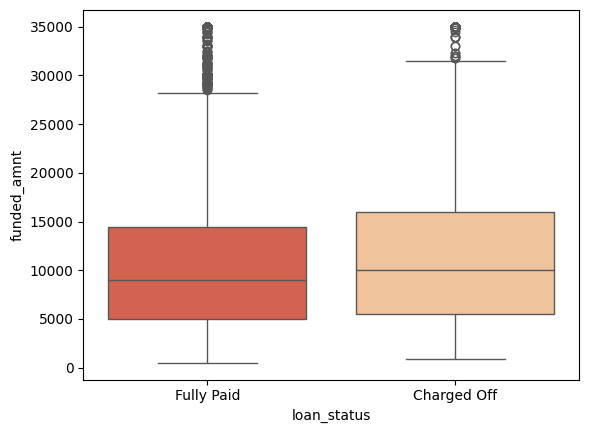

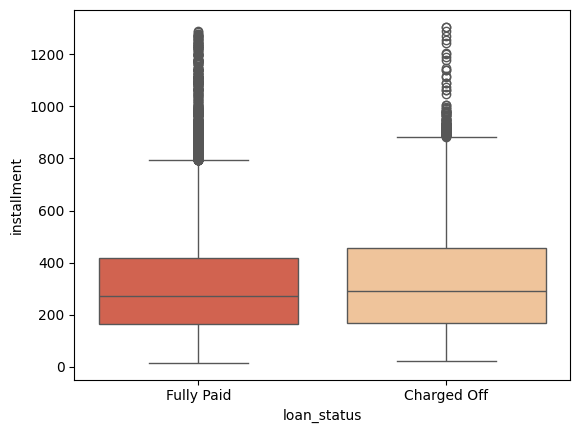

In [22]:
boxplot_segmented("loan_status", "loan_amnt", loan)
boxplot_segmented("loan_status", "annual_inc", loan)
boxplot_segmented("loan_status", "funded_amnt", loan)
boxplot_segmented("loan_status", "installment", loan)

#Observations:
# 1. There is no significant difference for loan amount vs loan status, but the number of Charged Off people are in the bucket of 5000 till 16000.
# 2. People having higher annual income have lesser chances of Charged off than Fully Paid.
# 3. People having higher funded amount have more chances of Charged off than Fully Paid.
# 4. People having installment more than 400 have more chances of Charged off than Fully Paid.

# Bivariate Analysis
We are going to do correlation and categorical variables comparision by doing group of two variables and having the target variable as "loan status".

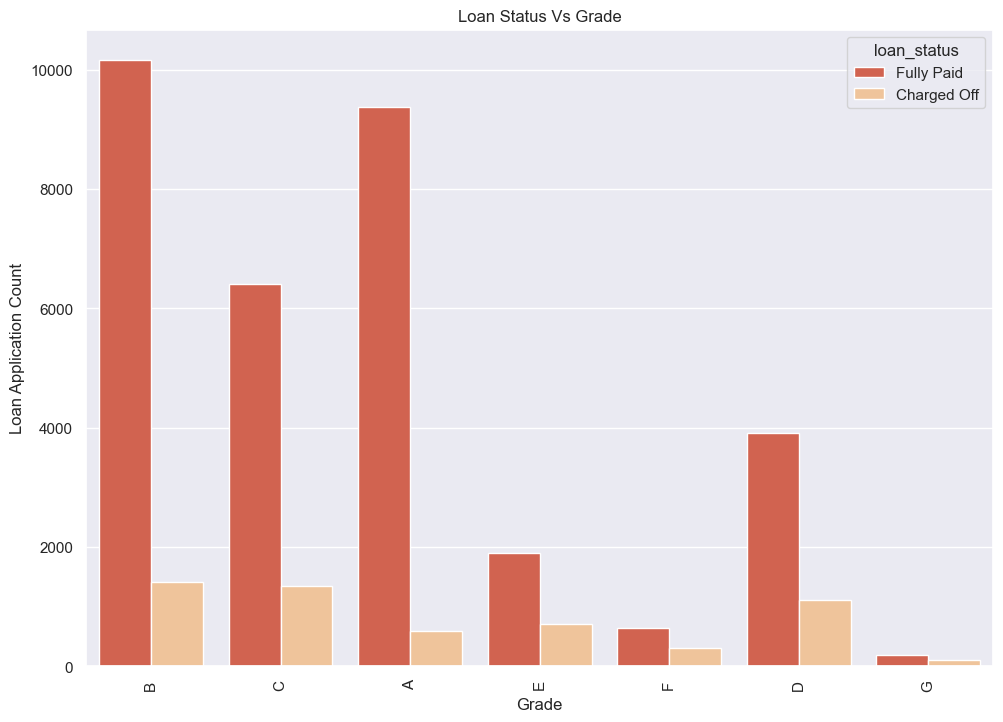

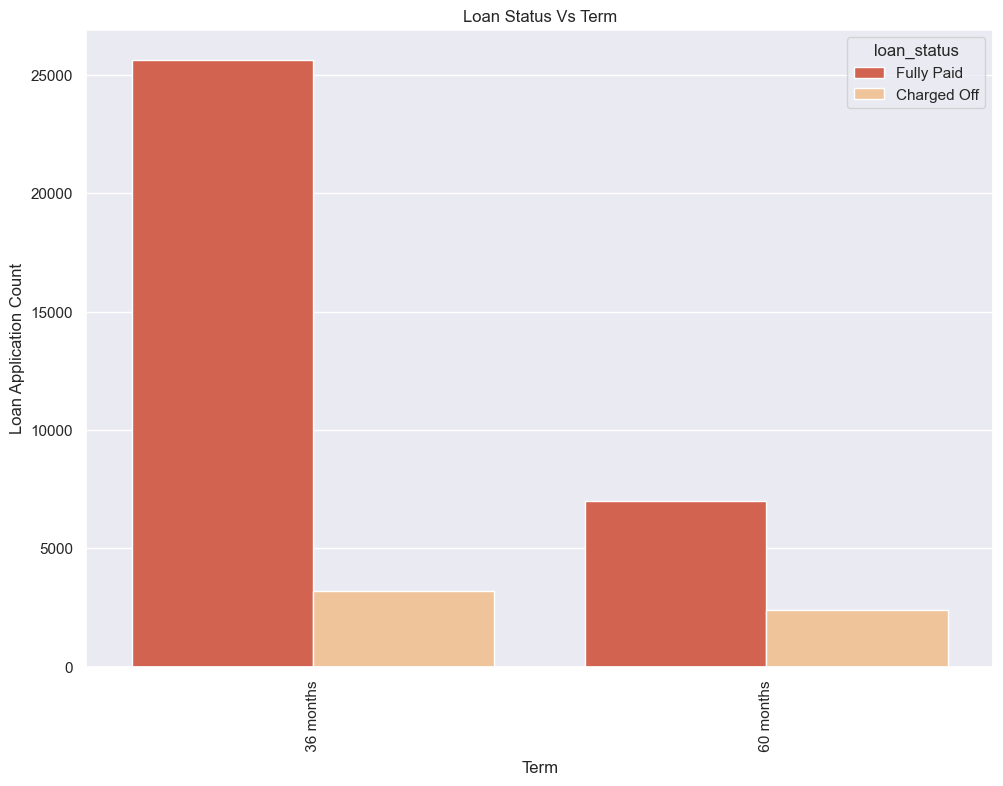

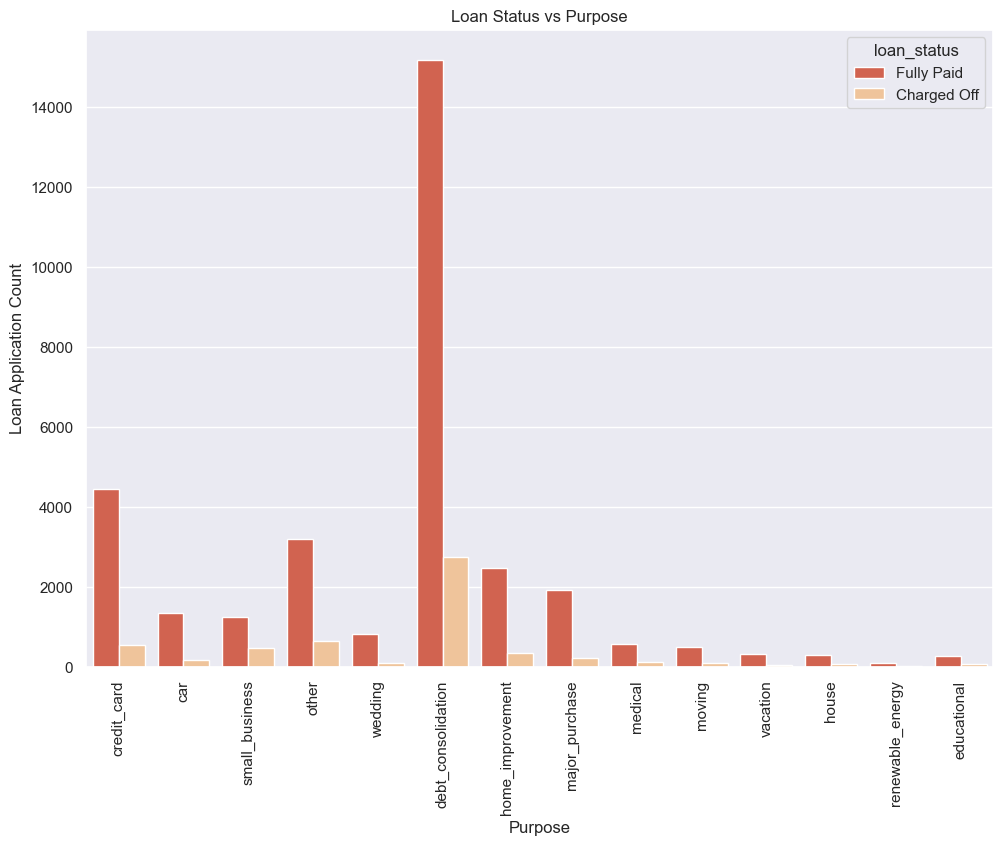

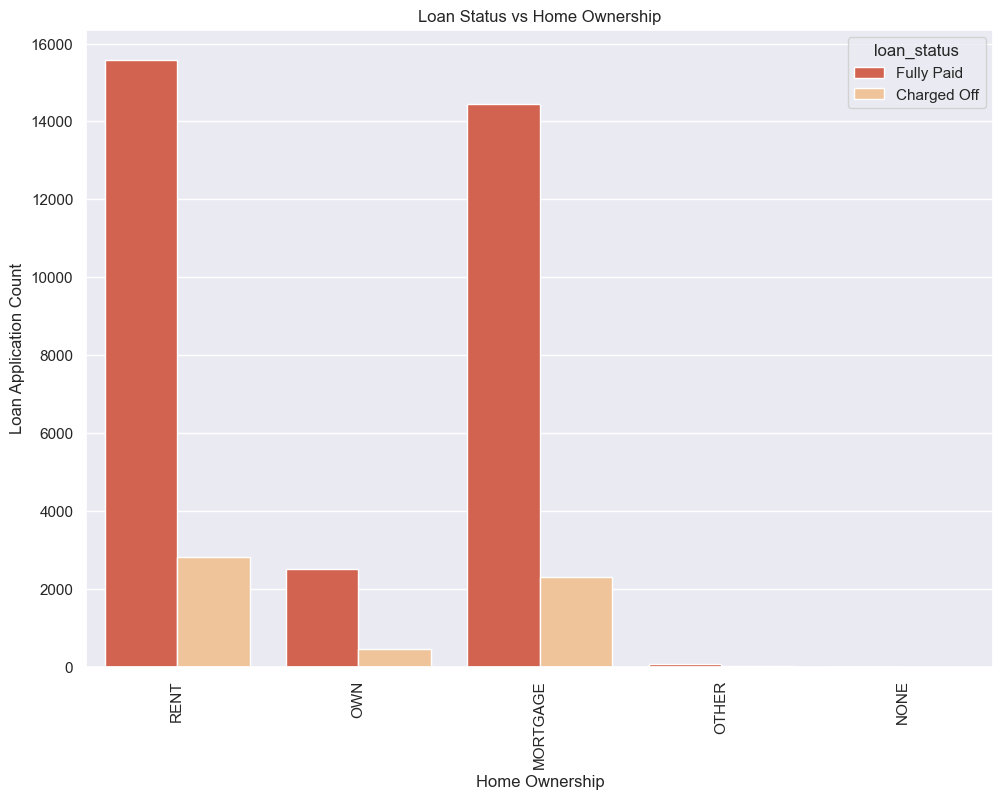

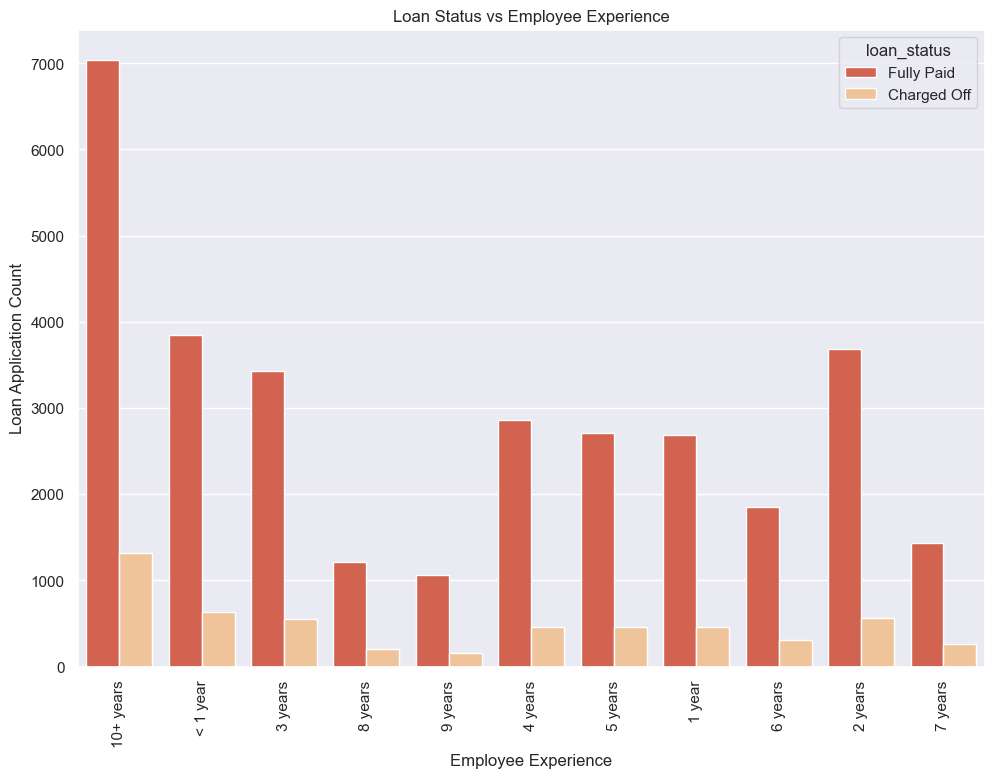

In [23]:
# def chargedoffPercentage(columnname, title):
#     purposedf = loan.groupby(by=[columnname])['loan_status'].value_counts()
#     purposedf = purposedf/purposedf.groupby(by=columnname).sum()
#     purposedf = purposedf.drop(labels=['Fully Paid'], level=1)
#     purposedf.plot(kind='bar', color=['r', 'orange'])
#     plt.title(title)
#     plt.figure(figsize=(20,12))
#     plt.show()

def loadstatus_bivariate(columname, title, xlabel, ylabel, hue, data=loan):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax = sns.countplot(data=data, x=columname, hue=hue, palette="OrRd_r")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

loadstatus_bivariate('grade', 'Loan Status Vs Grade', 'Grade', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('term', 'Loan Status Vs Term', 'Term', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('purpose', 'Loan Status vs Purpose', 'Purpose', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('home_ownership', 'Loan Status vs Home Ownership', 'Home Ownership', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('emp_length', 'Loan Status vs Employee Experience', 'Employee Experience', 'Loan Application Count', 'loan_status')

#Observations
#1. People in grade B and C are having more chances of charged off.
#2. People in 36 months load tenure have more chances of charged off.
#3. People having higher tendency of being charged off, if the loan purpose is debi consolidation, other categories, small business and credit card.
#4. People having higher tendency for doing charged off, if their home ownership is rented or mortgage.
#5. People belongs to experience group of 1 to 3 years and more than 10+ years are having more chances of Charged off.

### 60 months loan term see significantly large percentage of defaulters

In [24]:
# We are deriving year and month out of the issue_d.
loan['issue_d_year'] = pd.to_datetime(loan.issue_d, format='%b-%y').dt.year
loan['issue_d_month'] = pd.to_datetime(loan.issue_d, format='%b-%y').dt.month

In [25]:
# Creating categorical Values
loan['annual_inc_categories'] = pd.cut(loan.annual_inc, bins=[0, 20000,40000,60000,80000,100000],right=False)
loan['int_rate_categores'] = pd.cut(pd.to_numeric(loan.int_rate), bins=[0,5,10,15,20,25], right=False)
loan.head()

def verification_status(x):
    if x == 'Source Verified' or x == 'Not Verified':
        return 'Not Verified'
    else:
        return 'Verified'

loan.verification_status = loan.verification_status.apply(verification_status)

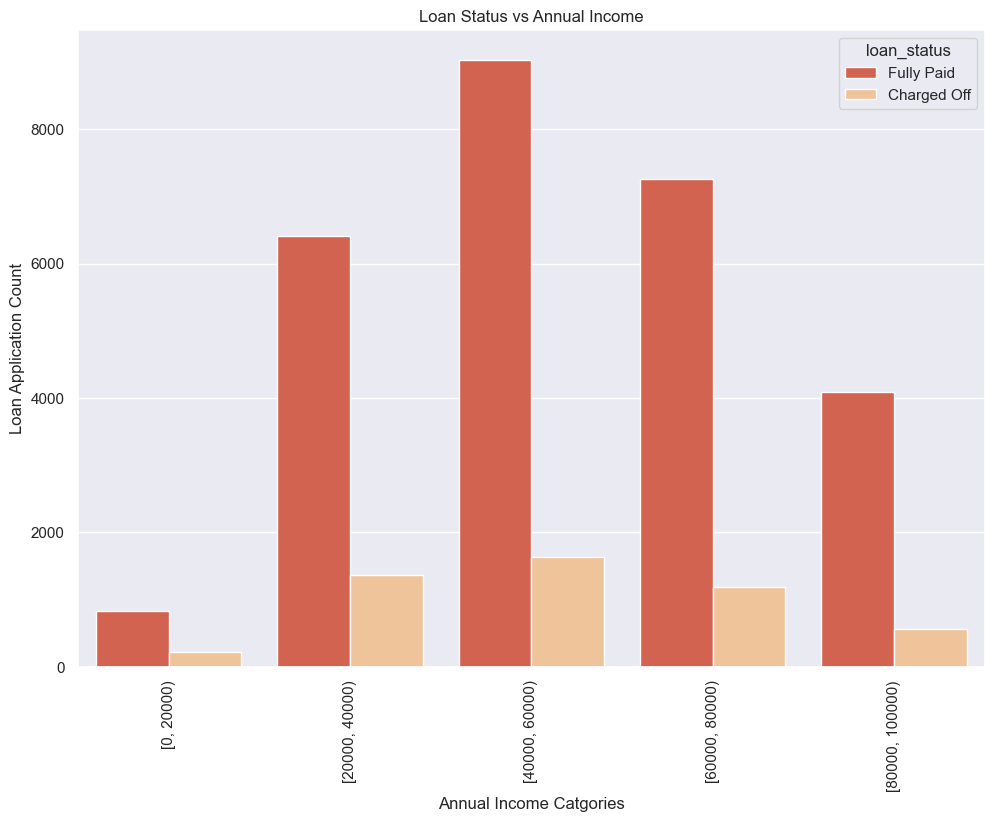

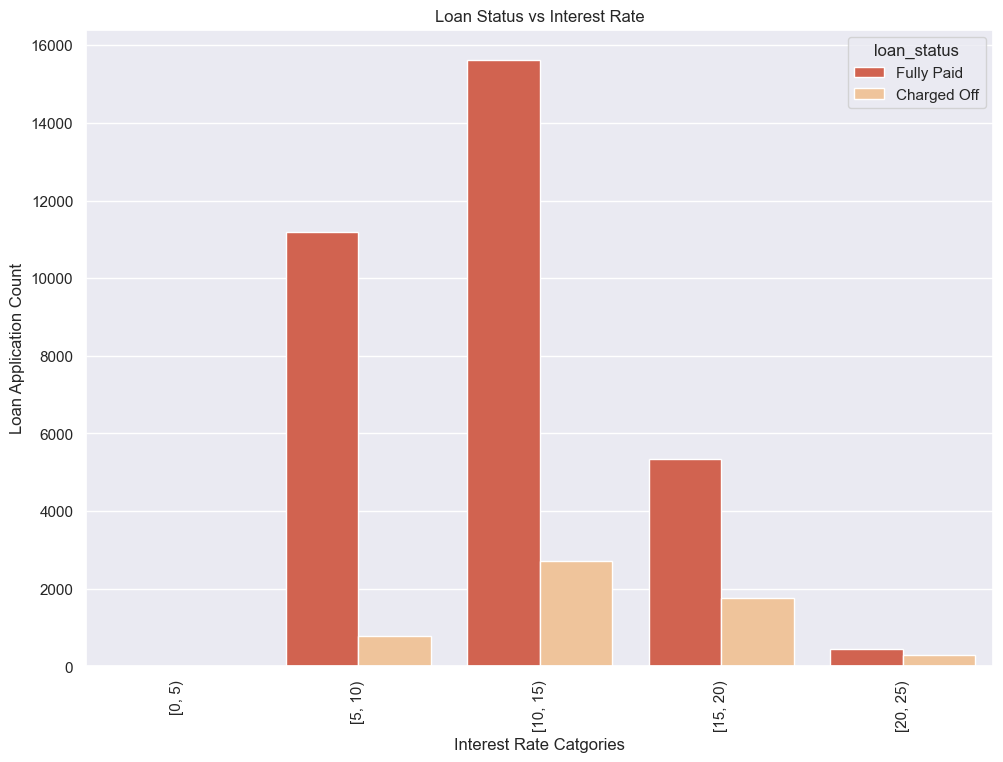

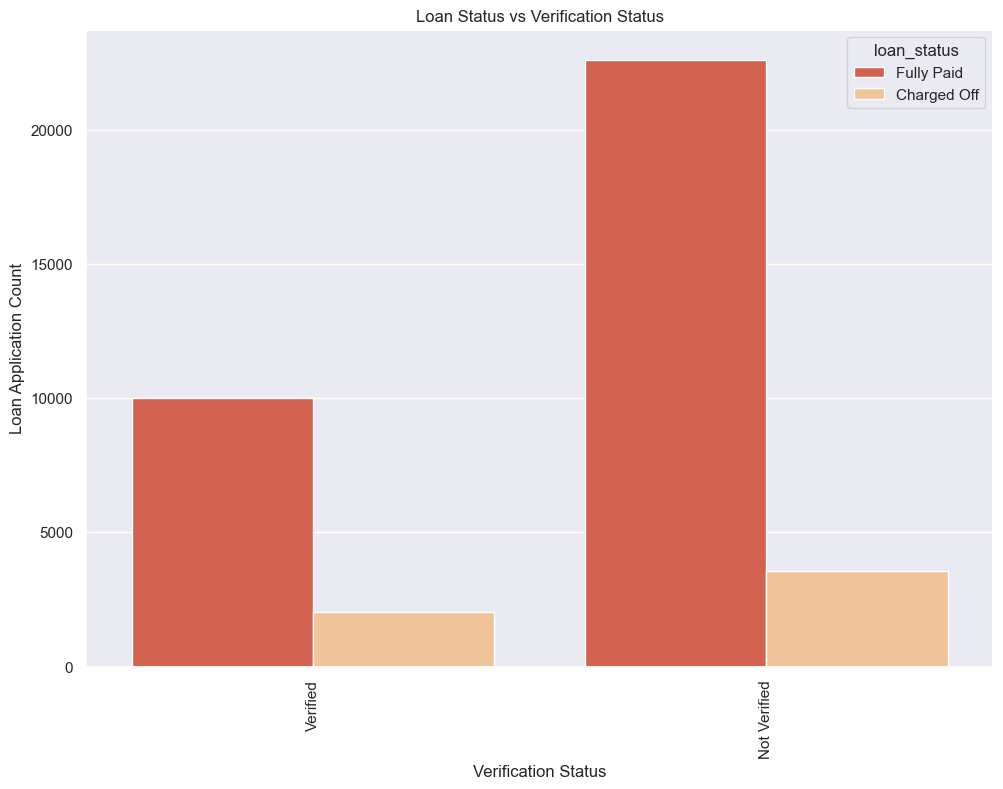

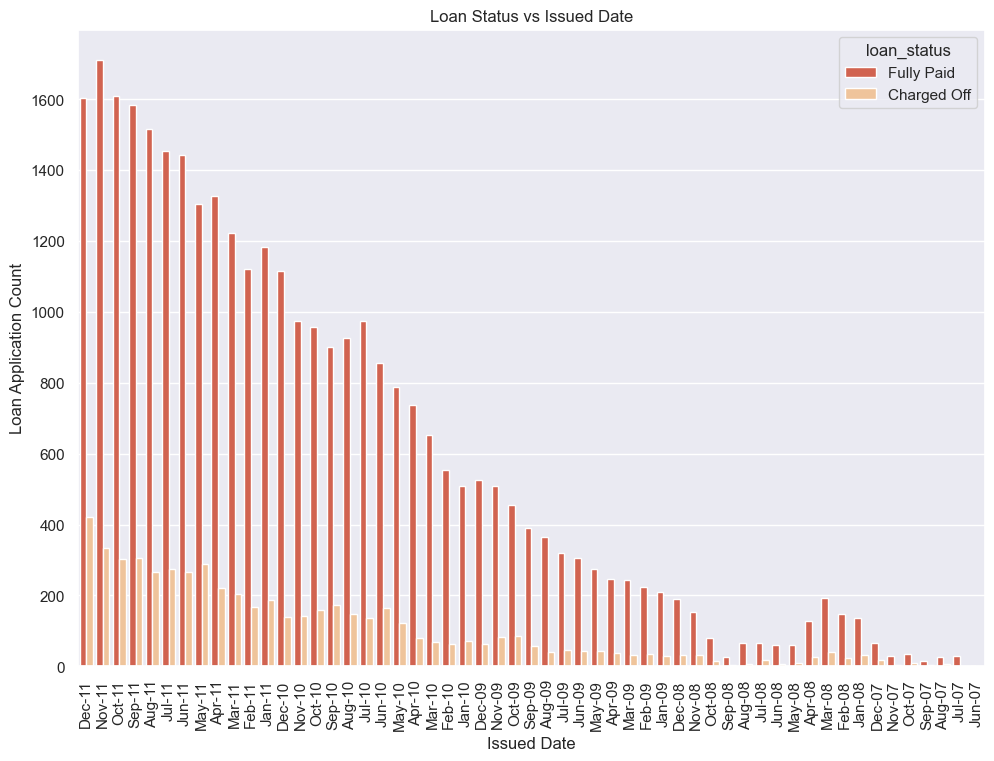

In [26]:
loadstatus_bivariate('annual_inc_categories', 'Loan Status vs Annual Income', 'Annual Income Catgories', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('int_rate_categores', 'Loan Status vs Interest Rate', 'Interest Rate Catgories', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('verification_status', 'Loan Status vs Verification Status', 'Verification Status', 'Loan Application Count', 'loan_status')
loadstatus_bivariate('issue_d', 'Loan Status vs Issued Date', 'Issued Date', 'Loan Application Count', 'loan_status')

#Observations:
#1. People having annual income in the range of 20000 to 60000 are having more chances of Charged Off.
#2. People took loan with insterest range between 10 t0 15 are having more chances of Charged Off.
#3. People with no verification are more prone to be Charged off, and hence we need to ensure proper verification for people before allocating the loan.
#4. People having Charged off chances are higher in the last months of every year, and hence the reason could be Holidays or any sort of Crisis or more expenses.


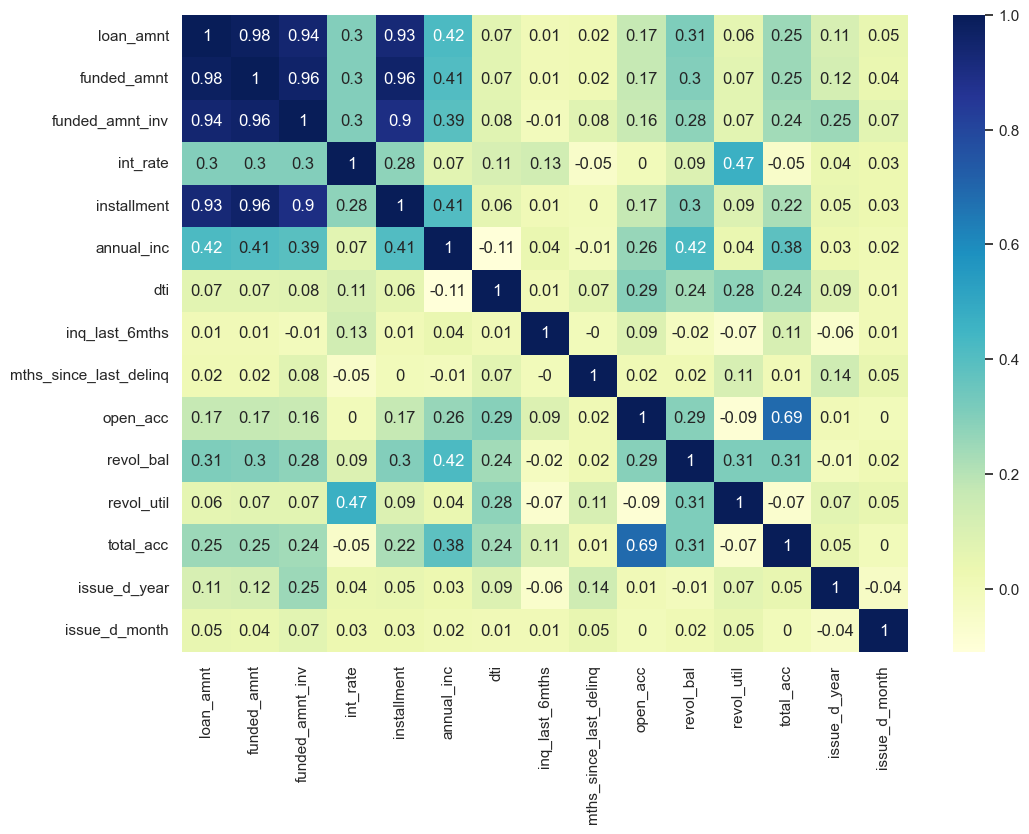

In [27]:
# Checking Correleation Matrix
sns.heatmap(loan.corr(numeric_only=True).round(2), cmap="YlGnBu", annot=True)
plt.show()

#Observations:
#1. The loan amount, funded amount and funded amount inv are positively correleated.
#2. DTI ratio is negatively correlated with annual income, which means higher the annual income lower is the DTI ratio.
#3. If Installement is higher, then the loan amount is also higher and interest rate is similar to both the factors.

<h2>Conclusions:</h2>
<h3>Univariate Analysis</h3>

* Number of 36 months loan are higher than 60 months loan</br>
* Employees with 10+ years of total experience availed maximum number of loans</br>
* Significantly higher number of loans are taken for debt consolidation purpose</br>
* Most loans are taken from people whose house ownership status is either rent or mortgage</br>
* Higher number of loans are taken from non verified sources</br>
* Loan issuance are increasing from jul 07 to dec 11</br>
* CA state has maximum loan applications</br>

<h3>Segmented Univariate Analysis</h3>

* There is no significant difference for loan amount vs loan status, but the number of Charged Off people are in the bucket of 5000 till 16000<br>
* People in higher annual income range have lesser chances of Charged off than Fully Paid<br>
* People in higher funded amount have more chances of Charged off than Fully Paid<br>
* People having installment more than 400 have more chances of Charged off than Fully Paid<br>

<h3>Bivariate Analysis</h3>

* People in grade B and C are having more chances of charged off<br>
* People in 36 months load tenure have more chances of charged off<br>
* People having higher tendency of being charged off, if the loan purpose is debi consolidation, other categories, small business and credit card<br>
* People having higher tendency for doing charged off, if their home ownership is rented or morgage<br>
* People belongs to experience group of 1 to 3 years and more than 10+ years are having more chances of Charged off<br>
* 60 months loan term see significantly large percentage of defaulters<br>
* People with annual income in the range of 20000 to 60000 are having more chances of Charged Off<br>
* People availed loan with insterest range between 10 t0 15 are having more chances of Charged Off<br>
* People with no verification status are more prone to be Charged off, and hence we need to ensure proper verification for people before allocating the loan<br>
* Charged off chances are higher for people in the last month of every year. Reason could be Holidays or any sort of Crisis or more expenses due to vacation plans<br>

<h3>Correlation</h3>

* The loan amount, funded amount and funded amount inv are positively correleated<br>
* DTI ratio is negatively correlated with annual income, which means higher the annual income lower is the DTI ratio<br>
* If Installement is higher, then the loan amount is also higher and interest rate is similar to both the factors<br>